<a href="https://colab.research.google.com/github/m-a-hasan/ai-colab/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to regression with neural networks in TensorFlow

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.2'

Creating data to view and fit

X is input variable and y is the output variable

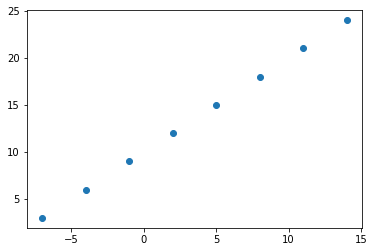

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (usually annotated as cap X)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label (usually annotated as small y)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualization
plt.scatter(X, y)

In [ ]:
# Relation between X and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
# Create demo tensor for housing price predictor problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X.ndim, y.ndim

(1, 1)

In [ ]:
# Turn X and y from NumPy to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

**Steps in modelling with tensorflow**

1. Creating a model - define the input and output layers - and hidden layer
2. Compiling a model by defining below,
> - The loss function (the function that tells our model how wrong it is)
> - The optimizer (tells our model how to improve the patterns)
> - Evaluation metrics (to interpret the performance of our model)
3. Fitting a model - Try to find patterns between X and y (features and labels)

In [ ]:
# Got error while fitting the model "Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)"
X.ndim, y.ndim


(1, 1)

In [ ]:
X = tf.expand_dims(X, axis=0)
y = tf.expand_dims(y, axis=0)
X, y, X.ndim, y.ndim

(<tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]])>,
 <tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]])>,
 2,
 2)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # Dense is 1 as we are taking 1 value of X and predicting 1 value of y
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5) # epoch is how many times model will go through each element of X and y to figure out the pattern

Epoch 1/5
1/1 [==============================] - 0s 470ms/step - loss: 6.4847 - mae: 6.4847
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 6.1865 - mae: 6.1865
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 6.0000 - mae: 6.0000
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 6.0000 - mae: 6.0000
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 6.0000 - mae: 6.0000


In [ ]:
# Checking X and y value
X, y

(<tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]])>,
 <tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]])>)

**First prediction using the model**

**Getting error <Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 8, but received input with shape (None, 1)>**

y_pred = model.predict([[17.0]])

y_pred

Time to create X and y with ndim = 2

In [ ]:
X = tf.constant([[-7., -4., -1.,  2.],
                 [5.,  8., 11., 14.]])
y = tf.constant([[3.,  6.,  9., 12.],
                 [15., 18., 21., 24.]])
X, y

(<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[-7., -4., -1.,  2.],
        [ 5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[ 3.,  6.,  9., 12.],
        [15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 331ms/step - loss: 16.3531 - mae: 16.3531
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 15.4031 - mae: 15.4031
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 14.4531 - mae: 14.4531
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 13.5031 - mae: 13.5031
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.5531 - mae: 12.5531


In [ ]:
# Checking X and y value
X, y

(<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[-7., -4., -1.,  2.],
        [ 5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[ 3.,  6.,  9., 12.],
        [15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
# Second try of prediction using the model

input_pred = tf.constant([[17., 20., 23.,  26.],
                          [29.,  32., 35., 38.]])
y_pred = model.predict(input_pred)
y_pred

# Expected [[29.], [41.]]

array([[11.457678],
       [17.831558]], dtype=float32)

**Improving our model**

1. Creating a model
>- Add more layers
>- Increase the number of hidden units (neurons)
>- Change the activation function of each hidden layer
2. Compiling a model
>- Change the optimization function
>- Change the ***learning rate*** of the optimization function
3. Fitting a model
>- More epochs (train for longer)
>- Give more examples to learn from

In [ ]:
# Recreating and improving the model step by step
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# This time train for longer
model.fit(X, y, epochs=44)

Epoch 1/44
1/1 [==============================] - 0s 275ms/step - loss: 16.3531 - mae: 16.3531
Epoch 2/44
1/1 [==============================] - 0s 7ms/step - loss: 15.4031 - mae: 15.4031
Epoch 3/44
1/1 [==============================] - 0s 7ms/step - loss: 14.4531 - mae: 14.4531
Epoch 4/44
1/1 [==============================] - 0s 6ms/step - loss: 13.5031 - mae: 13.5031
Epoch 5/44
1/1 [==============================] - 0s 6ms/step - loss: 12.5531 - mae: 12.5531
Epoch 6/44
1/1 [==============================] - 0s 6ms/step - loss: 11.6031 - mae: 11.6031
Epoch 7/44
1/1 [==============================] - 0s 6ms/step - loss: 10.6531 - mae: 10.6531
Epoch 8/44
1/1 [==============================] - 0s 6ms/step - loss: 9.7031 - mae: 9.7031
Epoch 9/44
1/1 [==============================] - 0s 6ms/step - loss: 8.7531 - mae: 8.7531
Epoch 10/44
1/1 [==============================] - 0s 6ms/step - loss: 7.8031 - mae: 7.8031
Epoch 11/44
1/1 [==============================] - 0s 6ms/step - loss: 6.

In [ ]:
# Let's predict again
y_pred = model.predict(input_pred)
y_pred
# Expected [[29.], [41.]]

array([[31.37017],
       [44.04405]], dtype=float32)

In [ ]:
# Improving model
# This actually started to overfit and become worse. To make it better play with neuron numbers and activation function to none instead of "relu".
tf.random.set_seed(42)

# This time train for longer
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=None),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Change epochs to 10 as it remains same afterwards
model.fit(X, y, epochs=10)


Epoch 1/10
1/1 [==============================] - 0s 317ms/step - loss: 11.6275 - mae: 11.6275
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 9.3732 - mae: 9.3732
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 7.0052 - mae: 7.0052
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 4.5707 - mae: 4.5707
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 3.6039 - mae: 3.6039
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 3.4549 - mae: 3.4549
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 3.3043 - mae: 3.3043
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 3.1517 - mae: 3.1517
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 3.0000 - mae: 3.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 3.0000 - mae: 3.0000


In [ ]:
# Let's predict again
y_pred = model.predict(input_pred)
y_pred
# Expected [[29.], [41.]]

array([[31.807148],
       [44.704536]], dtype=float32)

In [ ]:
# Improving model
# This actually started to overfit and become worse. To make it better play with neuron numbers and activation function to none instead of "relu".
tf.random.set_seed(42)

# This time train for longer
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=None),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Change epochs to 10 as it remains same afterwards
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 317ms/step - loss: 11.6275 - mae: 11.6275
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 9.3732 - mae: 9.3732
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 7.0052 - mae: 7.0052
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 4.5707 - mae: 4.5707
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 3.6039 - mae: 3.6039
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 3.4549 - mae: 3.4549
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 3.3043 - mae: 3.3043
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 3.1517 - mae: 3.1517
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 3.0000 - mae: 3.0000
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 3.0000 - mae: 3.0000


In [ ]:
# Improving model
tf.random.set_seed(42)

# This time train for longer
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=None),
  tf.keras.layers.Dense(1)
])

# Use Adam optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# Change epochs to 10 as it remains same afterwards
model.fit(X, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 364ms/step - loss: 11.6275 - mae: 11.6275
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 11.5458 - mae: 11.5458
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 11.4640 - mae: 11.4640
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 11.3822 - mae: 11.3822
Epoch 5/200
1/1 [==============================] - 0s 14ms/step - loss: 11.3002 - mae: 11.3002
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 11.2183 - mae: 11.2183
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 11.1362 - mae: 11.1362
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 11.0540 - mae: 11.0540
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 10.9717 - mae: 10.9717
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 10.8892 - mae: 10.8892
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - l

In [ ]:
# Let's predict again (NAILED IT!!!)
# ALWAYS REMEMBER, "lr" is the most important parameter
y_pred = model.predict(input_pred)
y_pred
# Expected [[29.], [41.]]

array([[29.596933],
       [41.085052]], dtype=float32)

Evaluating a model

Visualize
>- The data that we are working with
>- What the model looks like
>- How does a model perform while it learns
>- How does the predictions of a model line up against the truth

**The 3 sets**
1. Training set - the model learns from this data, typically 70 - 80% of the total data available
2. Validation set - model gets tuned on this data, typically 10 - 15% of the total data available
3. Test set - model gets evaluated on this data, typically 10 - 15% of the total data available

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40] # first 40 are training samples (80% of the data)
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:] # last 10 are testing samples (20% of the data)
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

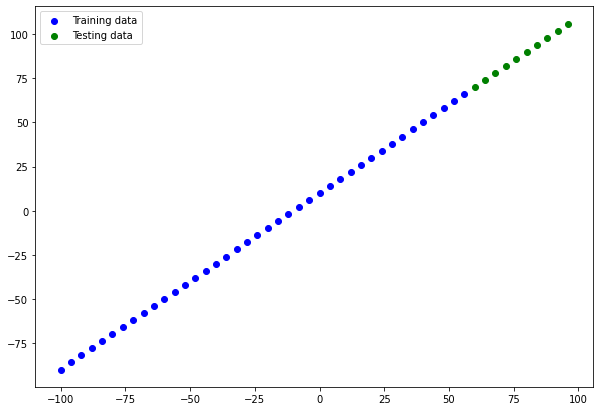

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Visualizing model
# Let's create a model with an input shape so it can build automatically
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Now we can visualize
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of patterns in the model (it will increase to 301 if the number of neuron changes to 100 with a hidden layer)
* Trainable params - number of parameter model updates as it learns
* Non-trainable params - these parameters aren't updated during training (typical when bringing already learnt parameters from other models during "transfer learning")

In [ ]:
# Now fit the model
# If verbose is 0, it will not output anything, 1 is default, 2 will output logs
model.fit(X_train, y_train, epochs=100, verbose=0)

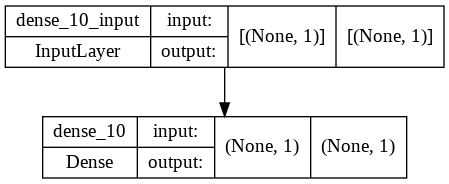

In [ ]:
# Another way of visualizing model
tf.keras.utils.plot_model(model=model, show_shapes=True)

Create models with user friendly names

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="test_input_1"),
  tf.keras.layers.Dense(1, name="test_output_1")
], name="test_model_1")

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
# Get summary of the model
model_1.summary()

Model: "test_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_1 (Dense)        (None, 10)                20        
                                                                 
 test_output_1 (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


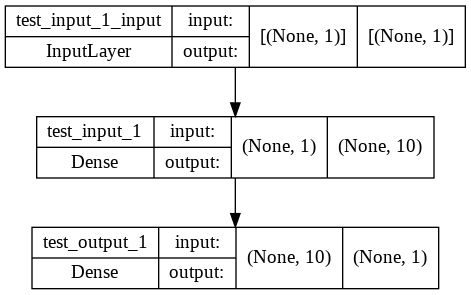

In [ ]:
tf.keras.utils.plot_model(model=model_1, show_shapes=True)

**Visualizing model's predictions**

Plot prediction against ground truth

Usually you'll name them as y_test, y_true and y_pred

In [ ]:
# Make predictions
y_pred = model_1.predict(X_test)
y_pred

array([[51.475273],
       [54.896004],
       [58.31673 ],
       [61.737457],
       [65.15818 ],
       [68.57891 ],
       [71.99964 ],
       [75.420364],
       [78.841095],
       [82.261826]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Create a function to plot so we can re-use it in future
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth with labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

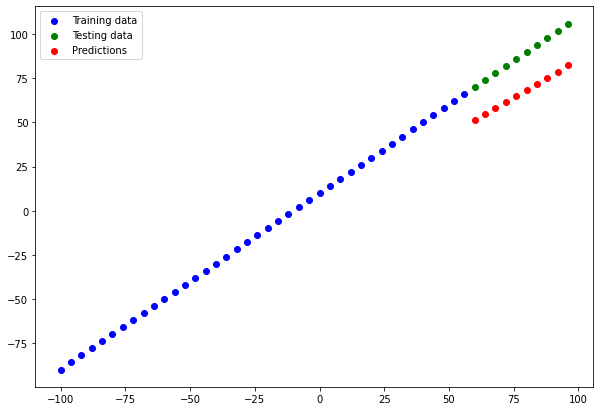

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

Evaluating our model's predictions with regression evaluation metrics

There are different evaluation metrics for model's performance.

We are currently working on regression model. 2 of the main metrics for regression are,
1. MAE - Mean Absolute Error - On average, how wrong is each of my model's predictions
2. MSE - Mean Square Error - Square of average error

In [ ]:
# Evaluate the model on the test
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 220ms/step - loss: 21.1315 - mae: 21.1315


[21.131450653076172, 21.131450653076172]

In [ ]:
# Calculate the mean absolute error
tf.keras.metrics.mean_absolute_error(
    y_test, y_pred
)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.524727, 33.103996, 29.68327 , 26.262543, 22.84182 , 19.42109 ,
       16.400288, 13.947782, 12.063562, 10.747635], dtype=float32)>

In [ ]:
# Result of MAE seems weird. Let's see what's different between these two values
y_test, y_pred
# Looks like y_test is a tensor. y_pred is an array.

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[51.475273],
        [54.896004],
        [58.31673 ],
        [61.737457],
        [65.15818 ],
        [68.57891 ],
        [71.99964 ],
        [75.420364],
        [78.841095],
        [82.261826]], dtype=float32))

In [ ]:
# Make y_pred a tensor as well
y_pred = tf.constant(y_pred)
y_test, y_pred
# Now they are both tensors. However, y_pred shape is different.

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[51.475273],
        [54.896004],
        [58.31673 ],
        [61.737457],
        [65.15818 ],
        [68.57891 ],
        [71.99964 ],
        [75.420364],
        [78.841095],
        [82.261826]], dtype=float32)>)

In [ ]:
# Squeeze y_pred for the unnecessary dimensions
y_pred = tf.squeeze(y_pred)
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([51.475273, 54.896004, 58.31673 , 61.737457, 65.15818 , 68.57891 ,
        71.99964 , 75.420364, 78.841095, 82.261826], dtype=float32)>)

In [ ]:
# Let's evaluate again
mae_1 = tf.metrics.mean_absolute_error(y_test, y_pred)
mae_1
# Nice!

<tf.Tensor: shape=(), dtype=float32, numpy=21.13145>

In [ ]:
# Instead of the whole thing, let's just get the numpy value
mae_1 = mae_1.numpy()
mae_1

21.13145

In [ ]:
# Calculate mean square error
mse_1 = tf.keras.metrics.mean_squared_error(y_test, y_pred)
mse_1 = mse_1.numpy()
mse_1

449.30658

In [ ]:
# Because we are going to calculate MAE and MSE frequently, let's make functions for these
# We will transform y_pred in the function so we don't have to transform them before passing the values
def calculate_mae(y_true=y_test,
                  y_pred=y_pred):
  return tf.metrics.mean_absolute_error(tf.squeeze(y_true), tf.squeeze(tf.constant(y_pred))).numpy()

def calculate_mse(y_true=y_test,
                  y_pred=y_pred):
  return tf.keras.metrics.mean_squared_error(tf.squeeze(y_true), tf.squeeze(tf.constant(y_pred))).numpy()

Running experiment to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it


In [ ]:
# Let's tweak the model and build another one
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(200, input_shape=[1], name="test_input_2"),
  tf.keras.layers.Dense(1, name="test_output_2")
], name="test_model_2")

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_2.summary()

Model: "test_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_2 (Dense)        (None, 200)               400       
                                                                 
 test_output_2 (Dense)       (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


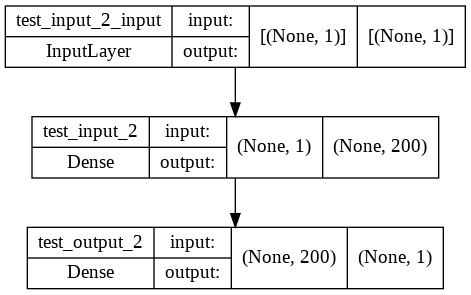

In [ ]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

In [ ]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([[ 69.28235],
       [ 73.24872],
       [ 77.21509],
       [ 81.18147],
       [ 85.14784],
       [ 89.11421],
       [ 93.0806 ],
       [ 97.04697],
       [101.01334],
       [104.97971]], dtype=float32)

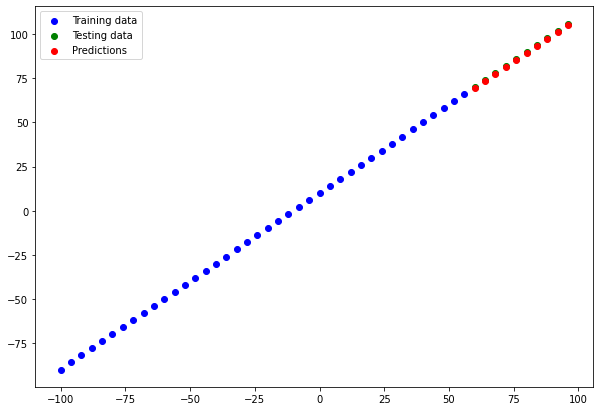

In [ ]:
# Plot
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_pred_2)

In [ ]:
# Evaluate
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 258ms/step - loss: 0.8690 - mae: 0.8690


[0.8689689636230469, 0.8689689636230469]

In [ ]:
# Calculate MAE
mae_2 = calculate_mae(y_test, y_pred_2)
mae_2

0.86896974

In [ ]:
# Calculate MSE
mse_2 = calculate_mse(y_test, y_pred_2)
mse_2

0.7644364

Comparing models

In [ ]:
# Compare model results using pandas DataFrame
from pandas import DataFrame as df

model_result = [["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2]]

all_result = df(model_result, columns=["model", "mae", "mse"])
all_result

,model,mae,mse
0,model_1,21.131451,449.306580
1,model_2,0.868970,0.764436


We can keep track of experiments and models using TensorBoard.

Another tool for tracking all experiments is **weights and biases**.

**Saving models**

Saving models allows us to use the model outside of the colab and in a mobile app or web app.

There are 2 formats to save model
1. The SavedModel format -> default
2. The HDF5 format

In [ ]:
# To see all the files generated by below command, click the folder icon from the left pane
model_2.save("my_model_2_SavedModel_format")

INFO:tensorflow:Assets written to: my_model_2_SavedModel_format/assets


In [ ]:
# Save model using HDF5 format
model_2.save("my_model_2_HDF5_format.h5")

Loading saved model

In [ ]:
# Load model in SavedModel format
loaded_SavedModel_2 = tf.keras.models.load_model("/content/my_model_2_SavedModel_format")

# Quickcheck if it is loaded
loaded_SavedModel_2.summary()

Model: "test_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_2 (Dense)        (None, 200)               400       
                                                                 
 test_output_2 (Dense)       (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with loaded_SavedModel_2 to be sure they are the same
loaded_SavedModel_2_pred = loaded_SavedModel_2.predict(X_test)

loaded_model_compare = [["model_2", mae_2, mse_2],
                        ["loaded_model", calculate_mae(y_test, loaded_SavedModel_2_pred), calculate_mse(y_test, loaded_SavedModel_2_pred)]]

df(loaded_model_compare, columns=["Model", "MAE", "MSE"])

,Model,MAE,MSE
0,model_2,0.86897,0.764436
1,loaded_model,0.86897,0.764436


In [ ]:
# Load model in .h5 format
loaded_h5_2 = tf.keras.models.load_model("/content/my_model_2_HDF5_format.h5")
loaded_h5_2.summary()

Model: "test_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input_2 (Dense)        (None, 200)               400       
                                                                 
 test_output_2 (Dense)       (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_2_pred = loaded_h5_2.predict(X_test)

loaded_h5_model_compare = [["model_2", mae_2, mse_2],
                           ["H5_model_2", calculate_mae(y_test, loaded_h5_2_pred), calculate_mse(y_test, loaded_h5_2_pred)]]

df(loaded_h5_model_compare, columns=["Model", "MAE", "MSE"])

,Model,MAE,MSE
0,model_2,0.86897,0.764436
1,H5_model_2,0.86897,0.764436


Downloading file from Google Colab

1. From file tab, right click -> download
2. Using code
3. We can also use Google Drive (not interested)

In [ ]:
# Downloading a file from Google Colab
# Commenting out below 2 lines of codes to stop downloading the file each time the program runs
#from google.colab import files
#files.download("/content/my_model_2_HDF5_format.h5")

**Insurence regression model**

In [ ]:
import pandas as pd

In [ ]:
# Read the dataset from github url
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Sample has strings and numbers. Let's use one-hot encoding to our DF so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Steps**
1. Create X and y values (features and labels)
2. Create training and test sets
3. Build a neural network model

In [ ]:
# Get all the column names from DataFrame
col_list = list(insurance_one_hot)
col_list

['age',
 'bmi',
 'children',
 'charges',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [ ]:
# Create label by getting only charges column
y_df = insurance_one_hot.charges
y_df

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Get features only (to be used as X)
X_df = insurance_one_hot.drop('charges', axis=1)
X_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# Create tensors and check dimension
# We will use scikit learn for test-train split. Therefore, these steps aren't required
X_delete_later = tf.constant(X_df)
y_delete_later = tf.constant(y_df)
X_delete_later, X_delete_later.ndim, X_delete_later.shape, y_delete_later, y_delete_later.ndim, y_delete_later.shape

(<tf.Tensor: shape=(1338, 11), dtype=float64, numpy=
 array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>,
 2,
 TensorShape([1338, 11]),
 <tf.Tensor: shape=(1338,), dtype=float64, numpy=
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603])>,
 1,
 TensorShape([1338]))

In [ ]:
# because X has 2 axis, let's convert y as columner value
y_delete_later = tf.expand_dims(y_delete_later, axis=1)
y_delete_later

<tf.Tensor: shape=(1338, 1), dtype=float64, numpy=
array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])>

In [ ]:
# Create training and test data
X_train_delete_later = X_delete_later[:1000, :]
X_test_delete_later = X_delete_later[-338:, :]
y_train_delete_later = y_delete_later[:1000, :]
y_test_delete_later = y_delete_later[-338:, :]
X_train_delete_later, X_test_delete_later, y_train_delete_later, y_test_delete_later

(<tf.Tensor: shape=(1000, 11), dtype=float64, numpy=
 array([[19.   , 27.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
        [18.   , 33.77 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
        [28.   , 33.   ,  3.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [63.   , 36.85 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        [33.   , 36.29 ,  3.   , ...,  0.   ,  0.   ,  0.   ],
        [36.   , 26.885,  0.   , ...,  1.   ,  0.   ,  0.   ]])>,
 <tf.Tensor: shape=(338, 11), dtype=float64, numpy=
 array([[30.  , 22.99,  2.  , ...,  1.  ,  0.  ,  0.  ],
        [24.  , 32.7 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [24.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])>,
 <tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
 array([[16884.924   ],
        [ 1725.5523  ],
        [ 4449.462   ],
        [21984.4706

In [ ]:
# But better than that, we can use sklearn to split training and testing data
# This way we can use pandas dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
len(X_df), len(X_train), len(X_test)

(1338, 1070, 268)

**Create 3 models**
1. Create model
2. Compile model
3. Fit model
4. Get model summary
5. Plot model
6. Predict
7. Plot predictions
8. Evaluate
9. Calculate
10. Compare

In [ ]:
tf.random.set_seed(42)

# 1. Create model 1
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[11], name="insurance_model_input_1"),
  tf.keras.layers.Dense(1, name="insurance_model_output_1")
], name="insurance_model_1")

# 2. Compile model 1
insurance_model_1.compile(optimizer=tf.keras.optimizers.SGD(),
                          loss=tf.keras.losses.mae,
                          metrics=["mae"])

# 3. Fit model 1
insurance_model_1.fit(X_train, y_train, epochs=100, verbose=0)

Even though it is Pandas it will still work with tensorflow as Pandas is built on NumPy

In [ ]:
insurance_model_1.summary()

Model: "insurance_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 insurance_model_input_1 (De  (None, 10)               120       
 nse)                                                            
                                                                 
 insurance_model_output_1 (D  (None, 1)                11        
 ense)                                                           
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


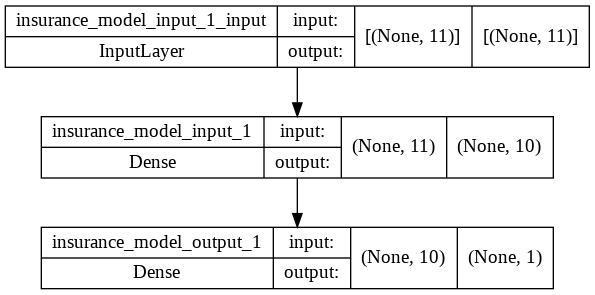

In [ ]:
tf.keras.utils.plot_model(insurance_model_1, show_shapes=True)

In [ ]:
y_insur_pred_1 = insurance_model_1.predict(X_test)
y_insur_pred_1

array([[12541.166 ],
       [ 8981.749 ],
       [20281.945 ],
       [12997.792 ],
       [ 7667.256 ],
       [ 9048.03  ],
       [ 3970.31  ],
       [16986.562 ],
       [ 6553.7   ],
       [13931.824 ],
       [11841.377 ],
       [11257.752 ],
       [ 7640.4194],
       [17186.02  ],
       [19633.303 ],
       [16880.6   ],
       [14148.9795],
       [16439.781 ],
       [12374.691 ],
       [14375.43  ],
       [ 7863.217 ],
       [11745.962 ],
       [ 3963.8625],
       [ 5556.0513],
       [14307.78  ],
       [14338.122 ],
       [15751.809 ],
       [ 7908.605 ],
       [13147.357 ],
       [ 3969.0344],
       [11877.595 ],
       [14943.573 ],
       [ 5069.9224],
       [ 8432.175 ],
       [ 6402.6353],
       [11912.932 ],
       [ 4998.167 ],
       [11293.194 ],
       [17304.564 ],
       [13189.915 ],
       [ 6431.8228],
       [ 5454.861 ],
       [15130.4   ],
       [15198.897 ],
       [ 9324.264 ],
       [15607.694 ],
       [ 5837.816 ],
       [ 7023

In [ ]:
tf.random.set_seed(42)

# 1. Create model 2
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model 2
insurance_model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                          loss=tf.keras.losses.mae,
                          metrics=["mae"])

# 3. Fit model 2
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
y_insur_pred_2 = insurance_model_2.predict(X_train)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3218 - mae: 3167.3218


[3167.32177734375, 3167.32177734375]

Text(0.5, 0, 'epochs')

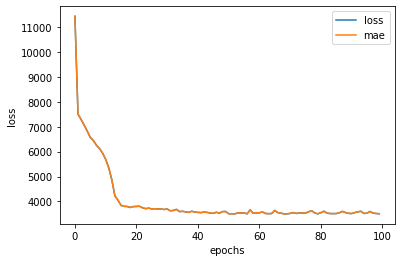

In [ ]:
# Plot history (AKA loss curve or training curve)
df(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Preprocessing data (normalization and standardization)

Normalization - data can be scattered and each on it's own scale. Instead of that we should make all numbers between 0 - 1

Neural network prefer normalization instead of standardization

In [ ]:
# Check how X_df has age in a different scale than bmi.
X_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


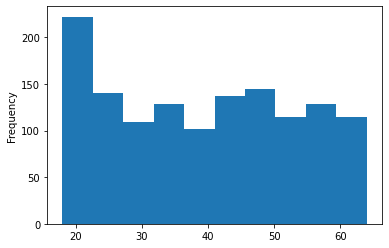

In [ ]:
# Plot age
X_df["age"].plot(kind="hist")

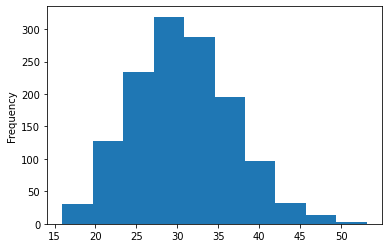

In [ ]:
X_df["bmi"].plot(kind="hist")

In [ ]:
# Check different number of children for people
X_df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Startover the entire project

Let's get all age, bmi and number of children on a scale (normalization) of 0 - 1

In [ ]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the dataset from github url
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer as mct
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
ct = mct(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn values in these columns between 0 - 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create learning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Check the difference
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

# Build a model on the normalized data
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# Fit the model on normalized data
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate insurance model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]